<a href="https://colab.research.google.com/github/Mukesh-Ganesh/AirBnb-Data-Analysis/blob/master/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**US Accidents Exploratory Data Analysis**

In [2]:
pip install opendatasets --upgrade

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Mukesh Ganesh1
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:10<00:00, 64.7MB/s]


In [4]:
data_filename = './us-accidents/US_Accidents_March23.csv'

#Data Preperation and Cleaning

1. Load the file using Pandas
2. Look at information about the data and the columns
3. Fix any missing or incorrect values

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(data_filename, nrows=4000000)

In [7]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.shape

(4000000, 46)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,4.000000e+06,4.000000e+06,4.000000e+06,597238.000000,597238.000000,4.000000e+06,3.928890e+06,2.324250e+06,3.924110e+06,3.939339e+06,3.919468e+06,3.586747e+06,2.197980e+06
mean,2.311414e+00,3.617822e+01,-9.364887e+01,36.485415,-95.056940,3.128967e-01,6.223662e+01,5.654051e+01,6.584219e+01,2.967493e+01,9.100470e+00,7.914684e+00,1.211047e-02
std,5.101885e-01,4.854093e+00,1.658358e+01,5.069098,17.823378,1.703760e+00,1.868072e+01,2.308470e+01,2.254920e+01,8.591752e-01,2.731189e+00,5.271016e+00,1.557143e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,24.570107,-124.539056,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.338571e+01,-1.118740e+02,33.677480,-117.437796,0.000000e+00,5.000000e+01,3.900000e+01,4.900000e+01,2.954000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.552393e+01,-8.752456e+01,36.810766,-87.918250,0.000000e+00,6.400000e+01,6.100000e+01,6.800000e+01,2.991000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.003774e+01,-8.079067e+01,40.491682,-80.277200,1.000000e-02,7.600000e+01,7.500000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,4.417500e+02,2.030000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,8.228000e+02,3.647000e+01


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

len(numeric_df.columns)

13

**Percentage of missing values**

In [13]:
df.isna().sum().sort_values(ascending = False)

,0
End_Lat,3402762
End_Lng,3402762
Precipitation(in),1802020
Wind_Chill(F),1675750
Wind_Speed(mph),413253
Visibility(mi),80532
Weather_Condition,79223
Humidity(%),75890
Temperature(F),71110
Wind_Direction,67611


In [14]:
missing_perentages = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_perentages

,0
End_Lat,85.069050
End_Lng,85.069050
Precipitation(in),45.050500
Wind_Chill(F),41.893750
Wind_Speed(mph),10.331325
Visibility(mi),2.013300
Weather_Condition,1.980575
Humidity(%),1.897250
Temperature(F),1.777750
Wind_Direction,1.690275


In [15]:
missing_perentages[missing_perentages != 0]

,0
End_Lat,85.069050
End_Lng,85.069050
Precipitation(in),45.050500
Wind_Chill(F),41.893750
Wind_Speed(mph),10.331325
Visibility(mi),2.013300
Weather_Condition,1.980575
Humidity(%),1.897250
Temperature(F),1.777750
Wind_Direction,1.690275


<Axes: >

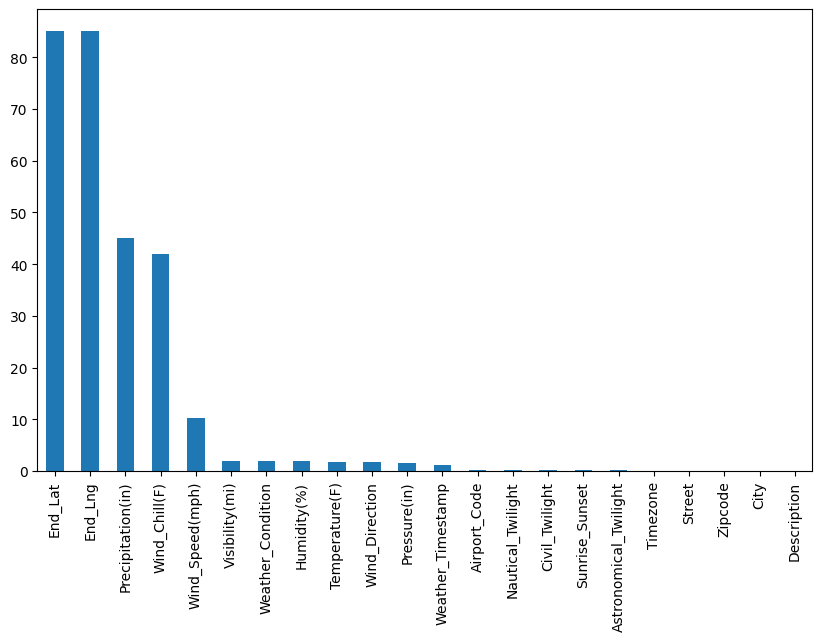

In [16]:
%matplotlib inline
missing_perentages[missing_perentages != 0].plot(kind = 'bar', figsize=(10, 6))

**Remove columns which you don't want to use**

In [17]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##**Exploratory Data Analysis**

Columns to analyze

1. City
2. Start Time
3. Start Lat & Start Lng
4. Temperature
5. Weather Condition

###**City column**

In [18]:
cities = df.City.unique()
len(cities)

12442

In [19]:
cities_by_accident = df.City.value_counts()
cities_by_accident

,count
City,
Houston,121686
Charlotte,98831
Dallas,80735
Los Angeles,76591
Austin,71907
...,...
Broad Channel,1
Midwest,1
Dugspur,1


In [20]:
cities_by_accident[:20]

,count
City,
Houston,121686
Charlotte,98831
Dallas,80735
Los Angeles,76591
Austin,71907
Raleigh,56298
Miami,49904
Baton Rouge,46300
Atlanta,46059


In [21]:
'New York' in df.City

False

In [22]:
'NY' in df.State

False

<Axes: xlabel='City'>

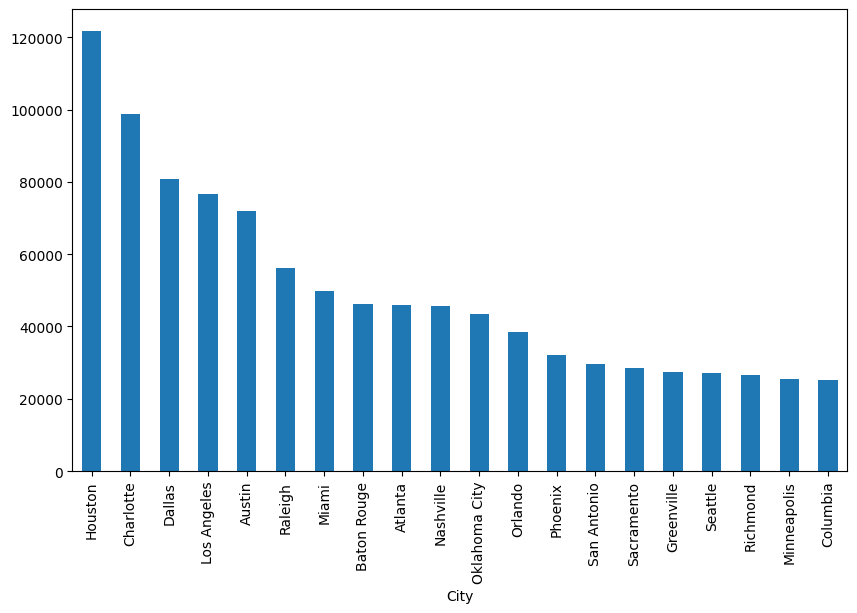

In [23]:
cities_by_accident[:20].plot(kind = 'bar', figsize=(10, 6))

**Top 5 Cities where most accidents occur are Houstan, Charlotte, Dallas, LA and Austin**

In [24]:
import seaborn as sns
sns.set_style('darkgrid')

<ipython-input-25-1f460903cad6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

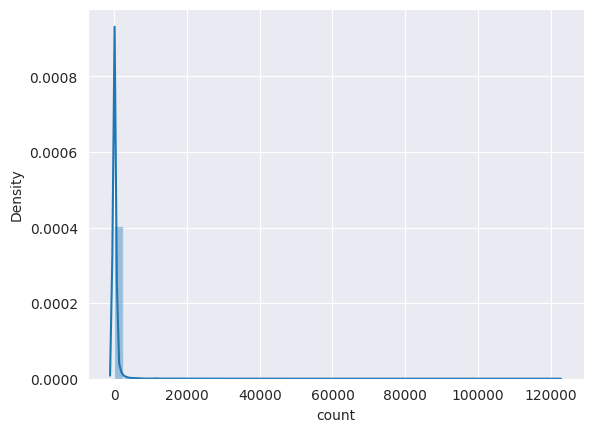

In [25]:
sns.distplot(cities_by_accident)

In [26]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [27]:
len(high_accident_cities)

670

In [28]:
len(high_accident_cities) / len(cities) * 100

5.384986336601832

<Axes: xlabel='count', ylabel='Count'>

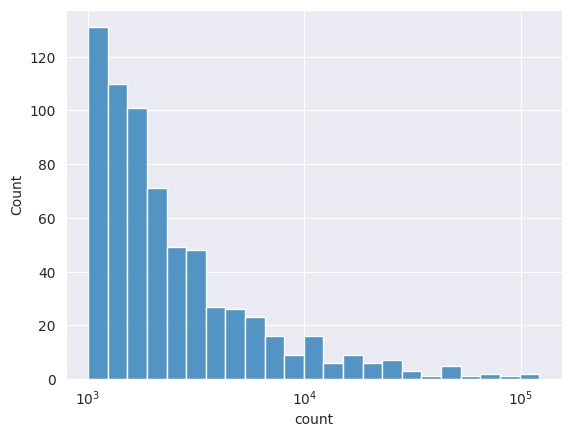

In [29]:
sns.histplot(high_accident_cities, log_scale = True)

In [30]:
len(low_accident_cities)

11771

<ipython-input-31-a69b07a78e7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<Axes: xlabel='count', ylabel='Density'>

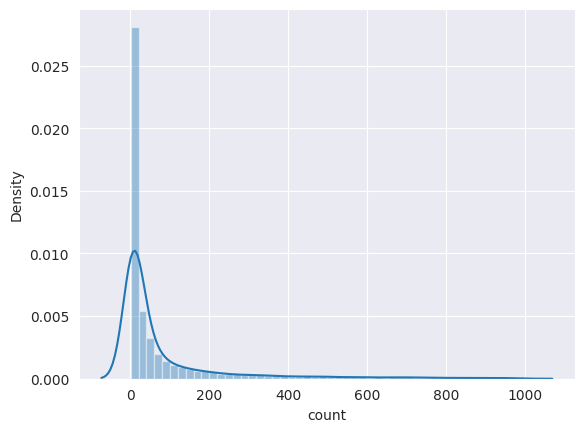

In [31]:
sns.distplot(low_accident_cities)

<Axes: xlabel='count', ylabel='Count'>

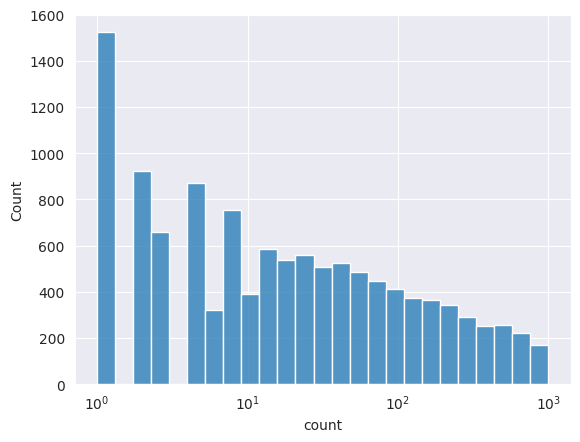

In [32]:
sns.histplot(low_accident_cities, log_scale = True)

In [33]:
cities_by_accident[cities_by_accident == 1].count()

1524

###**Which 5 states have the highest number of accidents?**

In [65]:
df.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [67]:
states_by_accident = df.State.value_counts()
states_by_accident

,count
State,
CA,787558
TX,395192
FL,351360
SC,251756
NC,207366
NY,184909
PA,139737
VA,122828
IL,120102


<Axes: xlabel='State'>

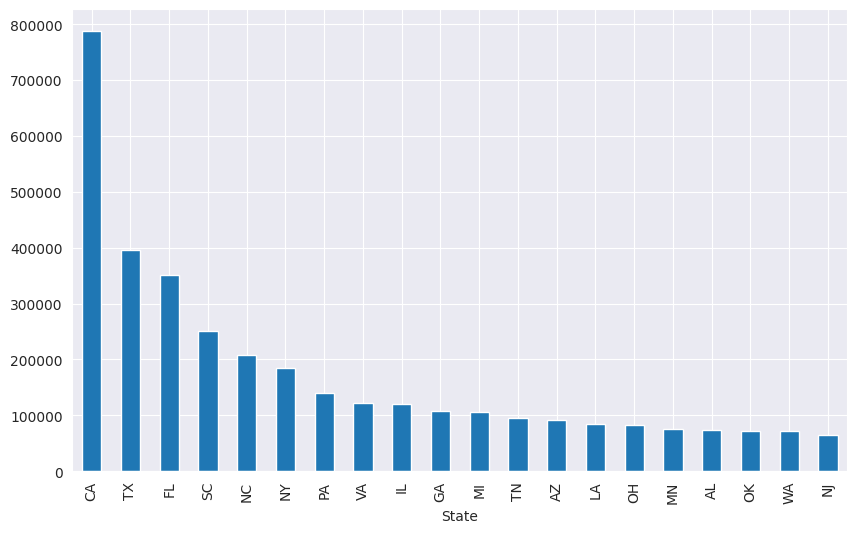

In [69]:
states_by_accident[:20].plot(kind = 'bar', figsize = (10,6))

**Top 5 states with most accidents are California, Texas, Florida, South Carolina and North Carolina**

###**Start Time column**

In [35]:
df.Start_Time

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
3999995,2022-09-01 12:35:28
3999996,2023-01-04 12:07:24
3999997,2022-02-22 14:25:22
3999998,2023-02-09 15:33:00


In [36]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [37]:
# Remove trailing zeros (e.g., ".000000000") from the datetime strings
df.Start_Time = df.Start_Time.str.replace(r'\.000000000', '', regex=True)

# Convert the cleaned column to datetime
df.Start_Time = pd.to_datetime(df.Start_Time, errors='coerce')

# Check if the conversion is successful
print(df.Start_Time.isna().sum())

8692


In [38]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

<Axes: xlabel='Start_Time', ylabel='Count'>

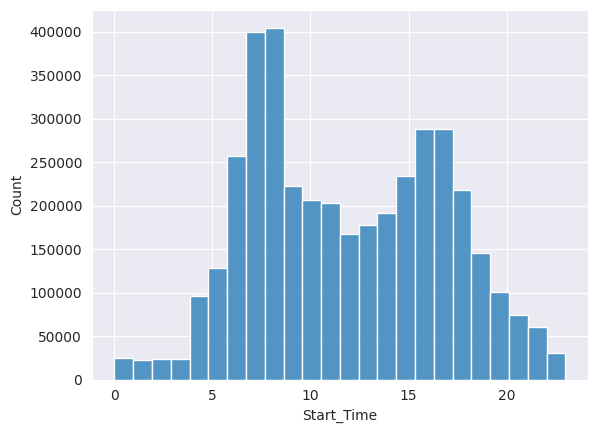

In [39]:
sns.histplot(df.Start_Time.dt.hour, bins = 24)

- **A high percentage of accidents occur between 6 am to 10 am. (Probably people are in a hurry to get to work)**
- **Next highest percentage of accidents occur between 3 pm to 6 pm. (Probably people are in a hurry to off work)**

<Axes: xlabel='Start_Time', ylabel='Count'>

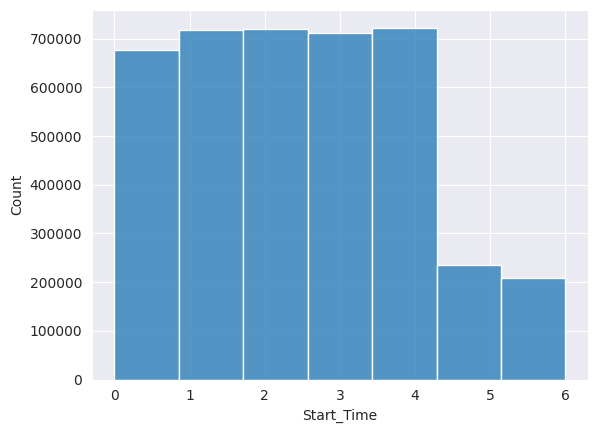

In [40]:
sns.histplot(df.Start_Time.dt.dayofweek, bins = 7)

**On weekends, the number of accidents are lower**

**Is the distribution of accidents by hour the same on weekends as on weekdays**

<Axes: xlabel='Start_Time', ylabel='Count'>

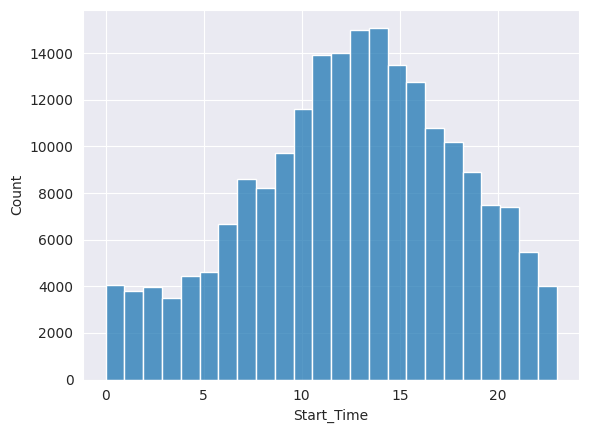

In [41]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins = 24)

<Axes: xlabel='Start_Time', ylabel='Count'>

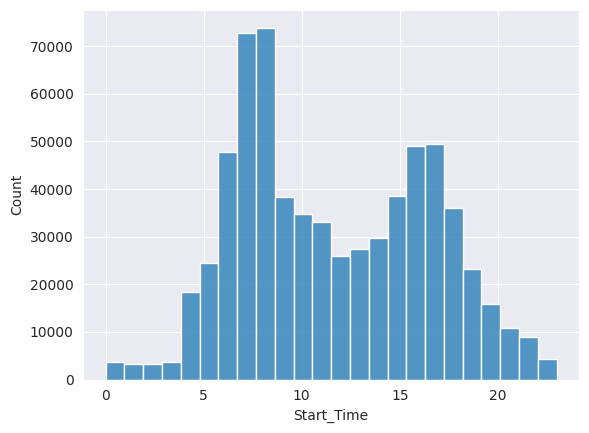

In [42]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins = 24)

**On Sundays, the peak accidents occur between 10 am and 3 am which is unlike on weekdays**

<Axes: xlabel='Start_Time', ylabel='Count'>

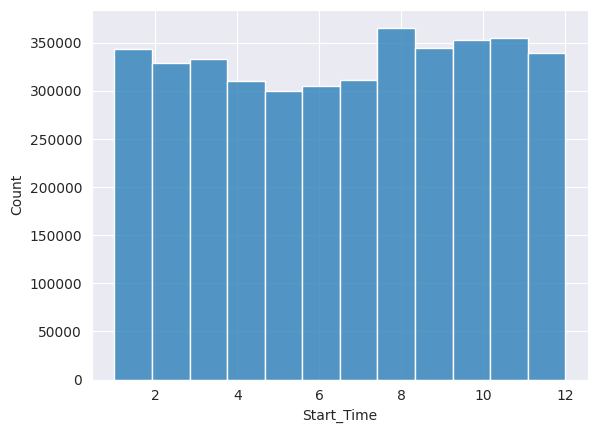

In [43]:
sns.histplot(df.Start_Time.dt.month, bins = 12)

In [44]:
df.Start_Time.dt.year

,Start_Time
0,2016.0
1,2016.0
2,2016.0
3,2016.0
4,2016.0
...,...
3999995,2022.0
3999996,2023.0
3999997,2022.0
3999998,2023.0


<Axes: xlabel='Start_Time', ylabel='Count'>

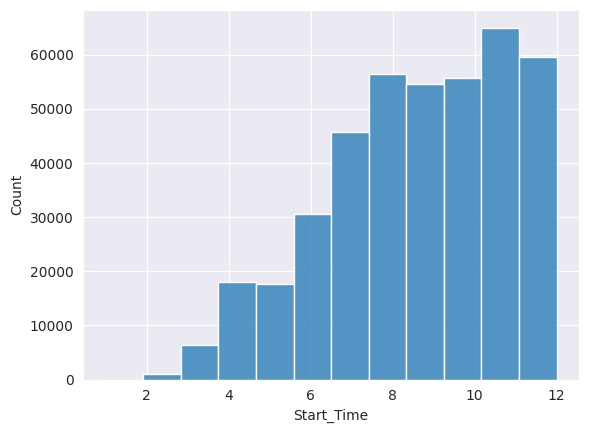

In [45]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_2016.Start_Time.dt.month, bins = 12)

**Looks like in 2016, accidents exponentially increased as the year progressed. Maybe its because of the data collected**

<Axes: xlabel='Start_Time', ylabel='Count'>

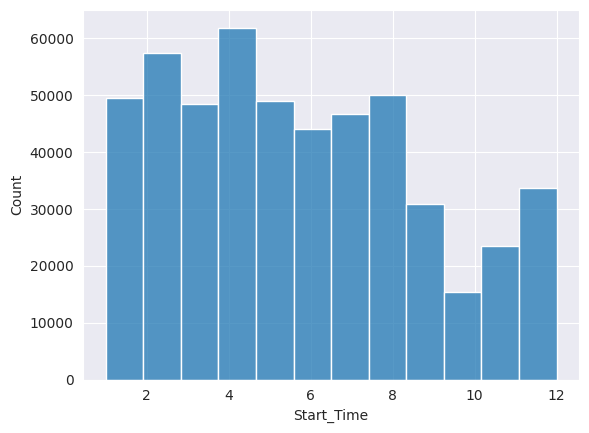

In [46]:
df_2022 = df[df.Start_Time.dt.year == 2022]
sns.histplot(df_2022.Start_Time.dt.month, bins = 12)

**Looks like in 2022, accidents exponentially decreased as the year progressed. Maybe its because of the data collected**

<Axes: xlabel='Start_Time', ylabel='Count'>

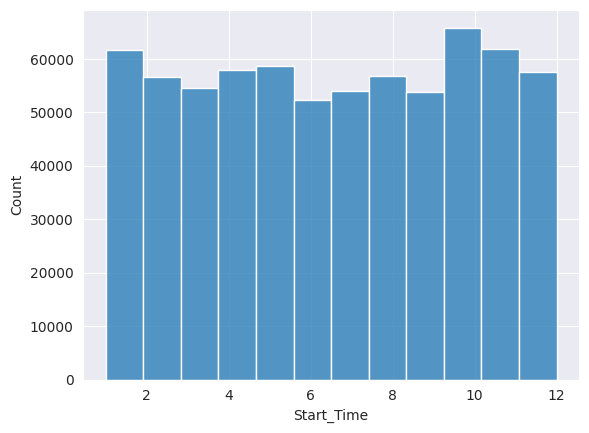

In [47]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.histplot(df_2019.Start_Time.dt.month, bins = 12)

**What is the trend of accidents year over year?**

<ipython-input-78-3e6b74f8e7bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.year, bins = 10)


<Axes: xlabel='Start_Time', ylabel='Density'>

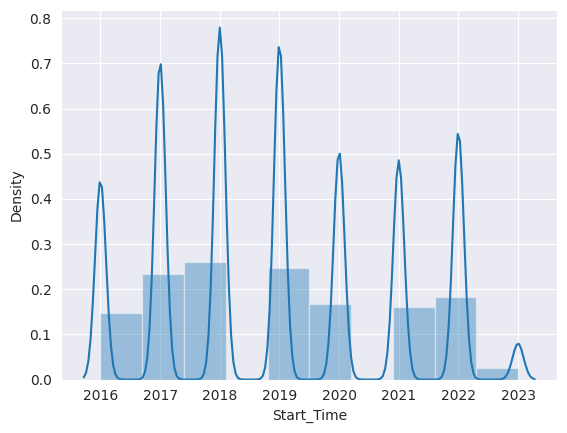

In [78]:
sns.distplot(df.Start_Time.dt.year, bins = 10)

<Axes: ylabel='count'>

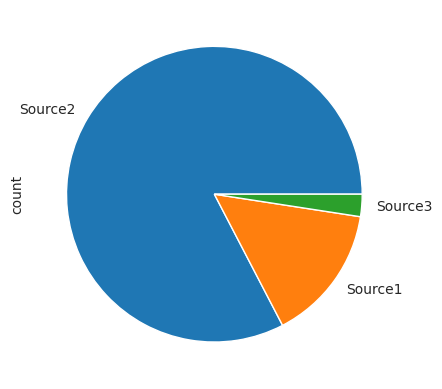

In [48]:
df.Source.value_counts().plot(kind = 'pie')

###**Start Latitude and Longitude columns**

In [49]:
df.Start_Lat

,Start_Lat
0,39.865147
1,39.928059
2,39.063148
3,39.747753
4,39.627781
...,...
3999995,40.007293
3999996,44.478363
3999997,44.476143
3999998,34.032884


In [50]:
df.Start_Lng

,Start_Lng
0,-84.058723
1,-82.831184
2,-84.032608
3,-84.205582
4,-84.188354
...,...
3999995,-76.038910
3999996,-93.917620
3999997,-93.922044
3999998,-118.117970


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

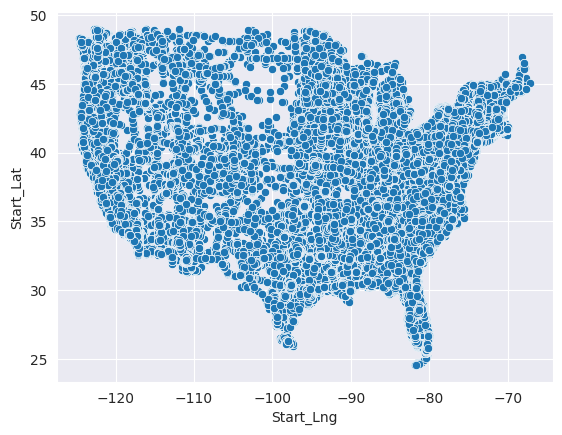

In [51]:
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat)

In [52]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

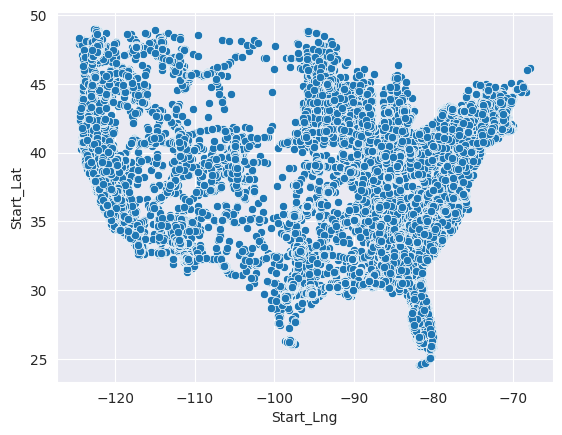

In [53]:
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat)

In [54]:
import folium
folium.Map(location = [38.9, -77.05], zoom_start = 12)

In [55]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [56]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iterrows():
  print(x)

(2763690, Start_Lat     34.110268
Start_Lng   -118.009056
Name: 2763690, dtype: float64)
(2884326, Start_Lat     31.773315
Start_Lng   -106.473480
Name: 2884326, dtype: float64)
(829417, Start_Lat     33.566433
Start_Lng   -112.117104
Name: 829417, dtype: float64)
(560153, Start_Lat    41.911831
Start_Lng   -72.784370
Name: 560153, dtype: float64)
(2631992, Start_Lat    40.593636
Start_Lng   -74.235069
Name: 2631992, dtype: float64)
(1821019, Start_Lat    33.86150
Start_Lng   -86.79747
Name: 1821019, dtype: float64)
(2249315, Start_Lat    32.786770
Start_Lng   -96.805359
Name: 2249315, dtype: float64)
(1610200, Start_Lat    28.417669
Start_Lng   -80.706711
Name: 1610200, dtype: float64)
(707596, Start_Lat     40.645779
Start_Lng   -111.946083
Name: 707596, dtype: float64)
(2002414, Start_Lat    25.964199
Start_Lng   -80.165855
Name: 2002414, dtype: float64)
(3444967, Start_Lat    39.22210
Start_Lng   -76.65351
Name: 3444967, dtype: float64)
(1348857, Start_Lat     39.599613
Start_Lng  

In [57]:
map = folium.Map()
marker = folium.Marker((lat, lon))
marker.add_to(map)
map

In [58]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(39.865147, -84.058723),
 (39.92805900000001, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999998),
 (39.627781, -84.188354),
 (40.10059, -82.92519399999998),
 (39.758274, -84.23050699999997),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.10059, -82.92519399999998),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999998),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999998),
 (39.773346, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000002),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000002),
 (39.75872, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999998),
 (39.974415, -82.848854),
 (39.994766, -83.02449),
 (40.006477, -83.0

In [59]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [60]:
from folium.plugins import HeatMap

map = folium.Map()
folium.plugins.HeatMap(lat_lon_pairs).add_to(map)
map

**Most accidents occur in either east or west coast. Central US do not have many accidents**

###**Temperature column**

In [71]:
df.columns.unique()

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [74]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [76]:
df.Weather_Condition.value_counts()[:20]

,count
Weather_Condition,
Fair,925755
Clear,713704
Mostly Cloudy,550379
Partly Cloudy,378158
Overcast,331962
Cloudy,317766
Light Rain,191821
Scattered Clouds,181533
Light Snow,57061


##**Summary and Conculsion**

##Insights

- No data from New York
- The number of accidents per city decreases exponentially
- Only around 5% of cities have more than 1000 yearly accidents
- Over 1500 cities have reported inly 1 accident (Maybe data not captured)
- Top 5 states with most accidents are California, Texas, Florida, South Carolina and North Carolina
- Top 5 Cities where most accidents occur are Houstan, Charlotte, Dallas, LA and Austin
- A high percentage of accidents occur between 6 am to 10 am. (Probably people are in a hurry to get to work)
- Next highest percentage of accidents occur between 3 pm to 6 pm. (Probably people are in a hurry to off work)
- On weekends, the number of accidents are lower
- On Sundays, the peak accidents occur between 10 am and 3 am which is unlike on weekdays
- Looks like in 2016, accidents exponentially increased as the year progressed. Maybe its because of the data collected
- Looks like in 2022, accidents exponentially decreased as the year progressed. Maybe its because of the data collected


- Most accidents occur in either east or west coast. Central US do not have many accidents